###import libraries


In [1]:
import pandas as pd
from matplotlib import pyplot as plt


###Load the data

In [2]:
#import libraries
df = pd.read_csv("dataset.csv")
print(df.head(5))

   CustomerID Transaction Date InvoiceNo                              product  \
0     17850.0        12/1/2010    536365   WHITE HANGING HEART T-LIGHT HOLDER   
1     17850.0        12/1/2010    536365                  WHITE METAL LANTERN   
2     17850.0        12/1/2010    536365       CREAM CUPID HEARTS COAT HANGER   
3     17850.0        12/1/2010    536365  KNITTED UNION FLAG HOT WATER BOTTLE   
4     17850.0        12/1/2010    536365       RED WOOLLY HOTTIE WHITE HEART.   

          Country  Quantity  price  Total Amount  
0  United Kingdom         6  255.0        275.40  
1  United Kingdom         6  339.0        366.12  
2  United Kingdom         8  275.0        297.00  
3  United Kingdom         6  339.0        366.12  
4  United Kingdom         6  339.0        366.12  


###check any null values

In [3]:
df.isna().any()  ##check empty values
df=df[df["product"].notna()] ##remove empty values in product column
df=df[df["CustomerID"].notna()] ##remove empty values in Costomer ID column

print(df.isna().sum())


CustomerID          0
Transaction Date    0
InvoiceNo           0
product             0
Country             0
Quantity            0
price               0
Total Amount        0
dtype: int64


##remove duplicates

In [4]:
df = df.drop_duplicates()

##handle outliers

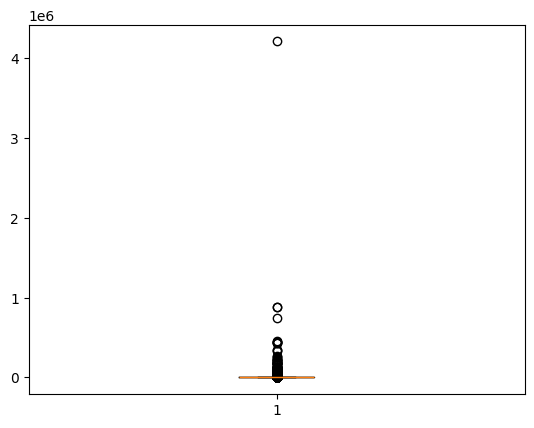

In [5]:
plt.boxplot(df["Total Amount"])
plt.show()

In [6]:
Q1=df["Total Amount"].quantile(.25)
Q3=df["Total Amount"].quantile(.75)
IQR = Q3-Q1

lower_bound = Q1-1.5*IQR 
upper_bound = Q3+1.5*IQR 


df[df["Total Amount"] > upper_bound]

,CustomerID,Transaction Date,InvoiceNo,product,Country,Quantity,price,Total Amount
5,17850.0,12/1/2010,536365,SET 7 BABUSHKA NESTING BOXES,United Kingdom,2,765.0,826.2
16,13047.0,12/1/2010,536367,BOX OF VINTAGE ALPHABET BLOCKS,United Kingdom,2,995.0,1074.6
19,13047.0,12/1/2010,536367,RECIPE BOX WITH METAL HEART,United Kingdom,4,795.0,858.6
20,13047.0,12/1/2010,536367,DOORMAT NEW ENGLAND,United Kingdom,4,795.0,858.6
45,12583.0,12/1/2010,536370,POSTAGE,France,3,1800.0,1944.0
...,...,...,...,...,...,...,...,...
541768,12713.0,12/9/2011,581578,POSTAGE,Germany,3,1800.0,1944.0
541786,12713.0,12/9/2011,581578,BOX OF VINTAGE ALPHABET BLOCKS,Germany,6,1195.0,1290.6
541831,17581.0,12/9/2011,581579,CHRISTMAS LIGHTS 10 REINDEER,United Kingdom,4,850.0,918.0
541849,12748.0,12/9/2011,581580,TABLECLOTH RED APPLES DESIGN,United Kingdom,2,995.0,1074.6


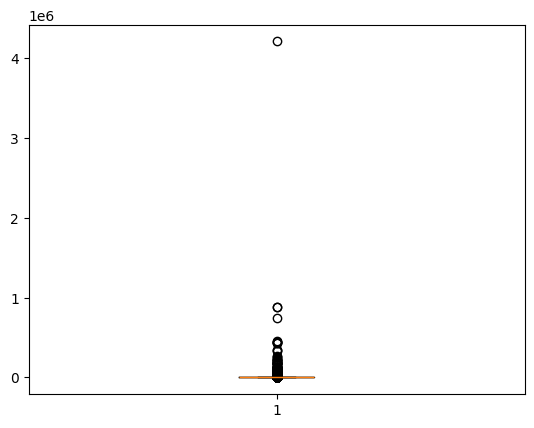

In [7]:
plt.boxplot(df["Total Amount"])
plt.show()

###RFM feature to data

R : Recency 	How recently the customer made a purchase	Days since their last order
F : Frequency	How often the customer made purchases	Number of orders placed
M : Monetary	How much the customer spent in total	Total money spent

In [8]:
import datetime

df["Transaction Date"] = pd.to_datetime(df["Transaction Date"])  ## convert transaction date to datetime format


latest_date=df["Transaction Date"].max() ## get latest purchase date

RFM = df.groupby("CustomerID").agg({"Transaction Date":lambda x:(latest_date-x.max()).days,
                                    "InvoiceNo":"count",
                                    "Total Amount":"size"}).reset_index()

RFM.columns = ["CustomerID","Recency","Frequency","Monetary"]

print(df.head(5))



   CustomerID Transaction Date InvoiceNo                              product  \
0     17850.0       2010-12-01    536365   WHITE HANGING HEART T-LIGHT HOLDER   
1     17850.0       2010-12-01    536365                  WHITE METAL LANTERN   
2     17850.0       2010-12-01    536365       CREAM CUPID HEARTS COAT HANGER   
3     17850.0       2010-12-01    536365  KNITTED UNION FLAG HOT WATER BOTTLE   
4     17850.0       2010-12-01    536365       RED WOOLLY HOTTIE WHITE HEART.   

          Country  Quantity  price  Total Amount  
0  United Kingdom         6  255.0        275.40  
1  United Kingdom         6  339.0        366.12  
2  United Kingdom         8  275.0        297.00  
3  United Kingdom         6  339.0        366.12  
4  United Kingdom         6  339.0        366.12  


###importing stander scaler

In [9]:
from sklearn.preprocessing import StandardScaler  ## for to became mean = 0 and standrad deviation is 1 for data

scaler = StandardScaler()

RFM_scaler = scaler.fit_transform(RFM[["Recency","Frequency","Monetary"]])



### importing K means

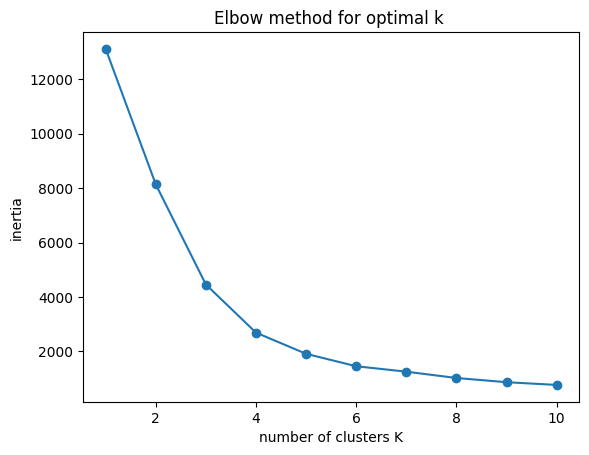

In [19]:
from sklearn.cluster import KMeans
inertia = []

for k in range(1,11):
    kmeans = KMeans(n_clusters = k, random_state=40)
    kmeans.fit(RFM_scaler)
    inertia.append(kmeans.inertia_)


plt.plot(range(1,11),inertia, marker='o')
plt.xlabel("number of clusters K")
plt.ylabel("inertia")
plt.title("Elbow method for optimal k ")
plt.show()

### applying KMeans slutering

In [25]:
kmeans = KMeans(n_clusters= 3 ,random_state=40)
RFM["clusters"] = kmeans.fit_predict(RFM_scaler)

###Vizualaiztion

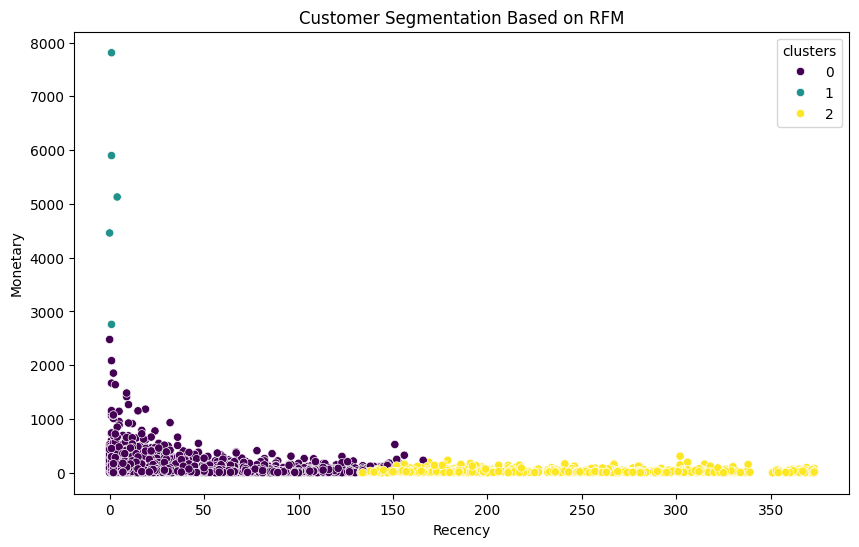

In [26]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.scatterplot(x=RFM["Recency"],y=RFM["Monetary"],hue=RFM["clusters"],palette="viridis")
plt.title("Customer Segmentation Based on RFM")
plt.show()


Cluster 0: High-value customers (High frequency, high spending) 

Cluster 1: New customers (Low frequency, low spending) 

Cluster 2: Frequent but low spenders